In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy import fftpack
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from PIL import Image
import cv2
import pickle
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import random
from numpy import asarray
from scipy.signal import stft
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
df_nose=pd.read_csv('/content/drive/MyDrive/fourier/nose_tran_400.csv',header=None)
df_et=pd.read_csv('/content/drive/MyDrive/fourier/ETdata_400.csv',header=None)
def plot_history(history, name):
    with plt.xkcd(scale=0.2):
      fig, ax = plt.subplots(1,2, figsize=(12,6))
      for i, metric in enumerate(['loss', 'accuracy']): 
          ax[i].plot(history.history[metric], label='Train', color='#EFAEA4',linewidth=3)
          ax[i].plot(history.history[f'val_{metric}'], label='Validation', color='#B2D7D0',linewidth=3)
          if metric == 'accuracy': 
            ax[i].axhline(0.5, color='#8d021f', ls='--', label='Trivial accuracy')
            ax[i].set_ylabel("Accuracy", fontsize=14)
          else:
            ax[i].set_ylabel("Loss", fontsize=14)
          ax[i].set_xlabel('Epoch', fontsize=14)

      plt.suptitle(f'{name} Training', y=1.05, fontsize=16)
      plt.legend(loc='best')
      plt.tight_layout()
df_comb=pd.concat([df_nose, df_et], join='inner', axis=1)

In [3]:
for i in range(400):
  comb=df_comb.iloc[i,:].to_numpy()
  nose=df_nose.iloc[i,:].to_numpy()
  tongue=df_et.iloc[i,:].to_numpy()
  
  comb_stan=(comb - np.mean(comb)) / np.std(comb) 
  nose_stan=(nose - np.mean(nose)) / np.std(nose) 
  tongue_stan=(tongue - np.mean(tongue)) / np.std(tongue) 


# Define the window length and overlap for the STFT
  window_length = 128
  overlap = 64

# Compute the STFT using the scipy library
  f, t, Zxx = stft(comb_stan, window='hamming', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'c_128_hamming.png'
  plt.savefig(sav)
  plt.clf()
  
  f, t, Zxx = stft(nose_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'n_128_hamming.png'
  plt.savefig(sav)
  plt.clf()

  
  f, t, Zxx = stft(tongue_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'t_128_hamming.png'
  plt.savefig(sav)
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(400):
  comb=df_comb.iloc[i,:].to_numpy()
  nose=df_nose.iloc[i,:].to_numpy()
  tongue=df_et.iloc[i,:].to_numpy()
  
  comb_stan=(comb - np.mean(comb)) / np.std(comb) 
  nose_stan=(nose - np.mean(nose)) / np.std(nose) 
  tongue_stan=(tongue - np.mean(tongue)) / np.std(tongue) 


# Define the window length and overlap for the STFT
  window_length = 64
  overlap = 32

# Compute the STFT using the scipy library
  f, t, Zxx = stft(comb_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'c_64_hann.png'
  plt.savefig(sav)
  plt.clf()
  
  f, t, Zxx = stft(nose_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'n_64_hann.png'
  plt.savefig(sav)
  plt.clf()

  
  f, t, Zxx = stft(tongue_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'t_64_hann.png'
  plt.savefig(sav)
  plt.clf()

In [ ]:
for i in range(400):
  comb=df_comb.iloc[i,:].to_numpy()
  nose=df_nose.iloc[i,:].to_numpy()
  tongue=df_et.iloc[i,:].to_numpy()
  
  comb_stan=(comb - np.mean(comb)) / np.std(comb) 
  nose_stan=(nose - np.mean(nose)) / np.std(nose) 
  tongue_stan=(tongue - np.mean(tongue)) / np.std(tongue) 


# Define the window length and overlap for the STFT
  window_length = 32
  overlap = 16

# Compute the STFT using the scipy library
  f, t, Zxx = stft(comb_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'c_32_hann.png'
  plt.savefig(sav)
  plt.clf()
  
  f, t, Zxx = stft(nose_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'n_32_hann.png'
  plt.savefig(sav)
  plt.clf()

  
  f, t, Zxx = stft(tongue_stan, window='hann', nperseg=window_length, noverlap=overlap)

# Plot the resulting spectrogram
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)))
  st=str(i)
  sav=st+'t_32_hann.png'
  plt.savefig(sav)
  plt.clf()

In [6]:
arr=np.array([1,0,0,0]*100)
arr2=np.array([0,1,0,0]*100)
arr3=np.array([0,0,1,0]*100)
arr4=np.array([0,0,0,1]*100)
y=np.vstack((arr,arr2,arr3,arr4)).reshape(400,4)


In [ ]:
k=asarray(Image.open('0n_128_hamming.png'))
for i in range(1,400):
  st=str(i)+'n_128_hamming.png'
  img = Image.open(st)
  numpydata = asarray(img)
  k=np.vstack((k,numpydata))

In [ ]:
x=k.reshape(400,480,640,4)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from tensorflow.keras import regularizers

model_nose = models.Sequential()
model_nose.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(480,640,4)))#, kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01)))
model_nose.add(layers.MaxPooling2D((2, 2)))
model_nose.add(layers.Conv2D(8, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_nose.add(layers.MaxPooling2D((2, 2)))
model_nose.add(tf.keras.layers.BatchNormalization())
model_nose.add(layers.Conv2D(16, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_nose.add(layers.MaxPooling2D((2, 2)))
model_nose.add(tf.keras.layers.BatchNormalization())
model_nose.add(layers.Conv2D(32, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_nose.add(layers.Flatten())
model_nose.add(layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_nose.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_nose.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 479, 639, 4)       68        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 318, 8)       136       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 119, 159, 8)      0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 119, 159, 8)      32        
 ormalization)                                                   
                                                        

In [ ]:
history_nose=model_nose.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15, batch_size=10)

Epoch 1/15
32/32 [==============================] - 13s 36ms/step - loss: 9.5213 - accuracy: 0.3781 - val_loss: 104.5985 - val_accuracy: 0.2250
Epoch 2/15
32/32 [==============================] - 1s 24ms/step - loss: 0.9661 - accuracy: 0.8031 - val_loss: 54.9122 - val_accuracy: 0.2250
Epoch 3/15
32/32 [==============================] - 1s 24ms/step - loss: 1.0970 - accuracy: 0.8000 - val_loss: 19.1864 - val_accuracy: 0.2250
Epoch 4/15
32/32 [==============================] - 1s 22ms/step - loss: 0.8659 - accuracy: 0.8344 - val_loss: 9.6924 - val_accuracy: 0.5500
Epoch 5/15
32/32 [==============================] - 1s 24ms/step - loss: 0.7548 - accuracy: 0.8844 - val_loss: 6.9572 - val_accuracy: 0.5375
Epoch 6/15
32/32 [==============================] - 1s 21ms/step - loss: 0.5240 - accuracy: 0.9594 - val_loss: 5.8235 - val_accuracy: 0.3500
Epoch 7/15
32/32 [==============================] - 1s 21ms/step - loss: 0.5453 - accuracy: 0.9594 - val_loss: 4.3828 - val_accuracy: 0.5375
Epoch 8/

In [ ]:
results_nose = model_nose.evaluate(X_test, y_test, batch_size=10)
print("test loss, test acc:", results_nose)

8/8 [==============================] - 0s 17ms/step - loss: 0.5705 - accuracy: 0.9125
test loss, test acc: [0.5704876184463501, 0.9125000238418579]


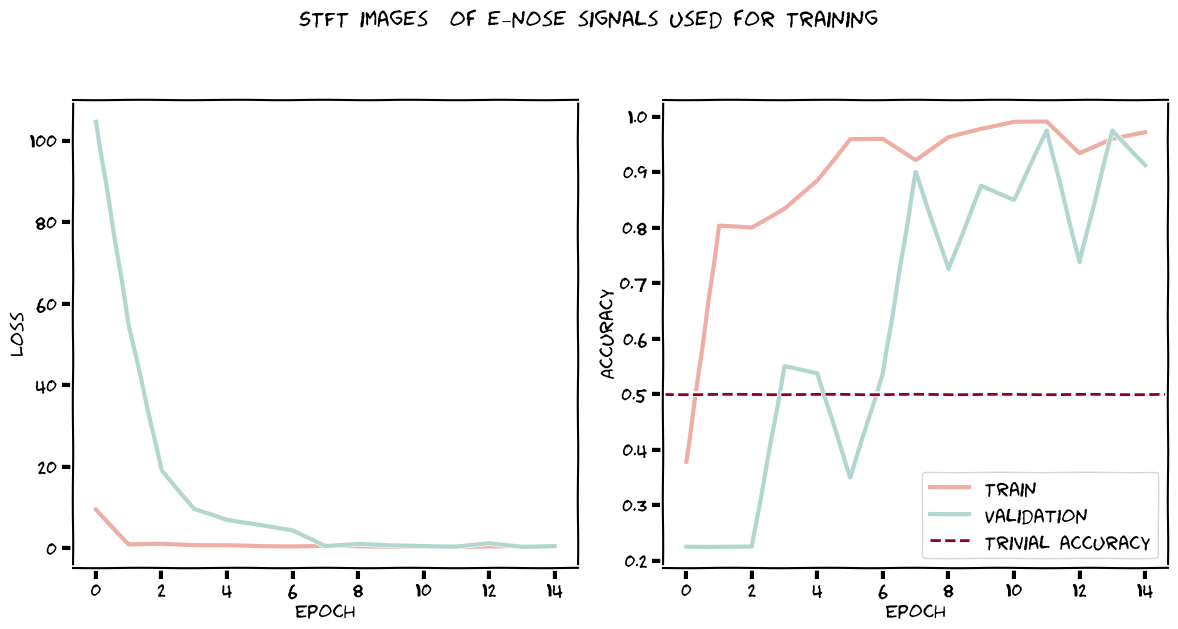

In [ ]:
plot_history(history_nose, 'STFT images  of e_nose signals used for')

In [4]:
k=asarray(Image.open('0t_128_hamming.png'))
for i in range(1,400):
  st=str(i)+'t_128_hamming.png'
  img = Image.open(st)
  numpydata = asarray(img)
  k=np.vstack((k,numpydata))


In [7]:
x=k.reshape(400,480,640,4)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
from tensorflow.keras import regularizers

model_ton = models.Sequential()
model_ton.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(480,640,4)))#, kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01)))
model_ton.add(layers.MaxPooling2D((2, 2)))
model_ton.add(layers.Conv2D(8, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_ton.add(layers.MaxPooling2D((2, 2)))
model_ton.add(tf.keras.layers.BatchNormalization())
model_ton.add(layers.Conv2D(16, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_ton.add(layers.MaxPooling2D((2, 2)))
model_ton.add(tf.keras.layers.BatchNormalization())
model_ton.add(layers.Conv2D(32, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_ton.add(layers.Flatten())
model_ton.add(layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_ton.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ton.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 479, 639, 4)       68        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 318, 8)       136       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 119, 159, 8)      0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 119, 159, 8)      32        
 ormalization)                                                   
                                                        

In [9]:
history_ton_com=model_ton.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15, batch_size=10)

Epoch 1/15
32/32 [==============================] - 15s 39ms/step - loss: 11.2283 - accuracy: 0.2906 - val_loss: 87.4522 - val_accuracy: 0.2250
Epoch 2/15
32/32 [==============================] - 1s 25ms/step - loss: 2.1137 - accuracy: 0.5000 - val_loss: 54.2043 - val_accuracy: 0.2250
Epoch 3/15
32/32 [==============================] - 1s 26ms/step - loss: 1.0671 - accuracy: 0.7531 - val_loss: 23.4755 - val_accuracy: 0.2250
Epoch 4/15
32/32 [==============================] - 1s 29ms/step - loss: 0.8429 - accuracy: 0.8344 - val_loss: 9.3381 - val_accuracy: 0.3875
Epoch 5/15
32/32 [==============================] - 1s 28ms/step - loss: 0.5655 - accuracy: 0.9594 - val_loss: 2.9110 - val_accuracy: 0.7750
Epoch 6/15
32/32 [==============================] - 1s 30ms/step - loss: 0.4605 - accuracy: 0.9875 - val_loss: 1.5295 - val_accuracy: 0.7750
Epoch 7/15
32/32 [==============================] - 1s 28ms/step - loss: 0.4419 - accuracy: 0.9906 - val_loss: 1.1489 - val_accuracy: 0.7750
Epoch 8/

In [10]:
results_tongue = model_ton.evaluate(X_test, y_test, batch_size=10)
print("test loss, test acc:", results_tongue)

8/8 [==============================] - 0s 14ms/step - loss: 0.4486 - accuracy: 0.9750
test loss, test acc: [0.4485984742641449, 0.9750000238418579]


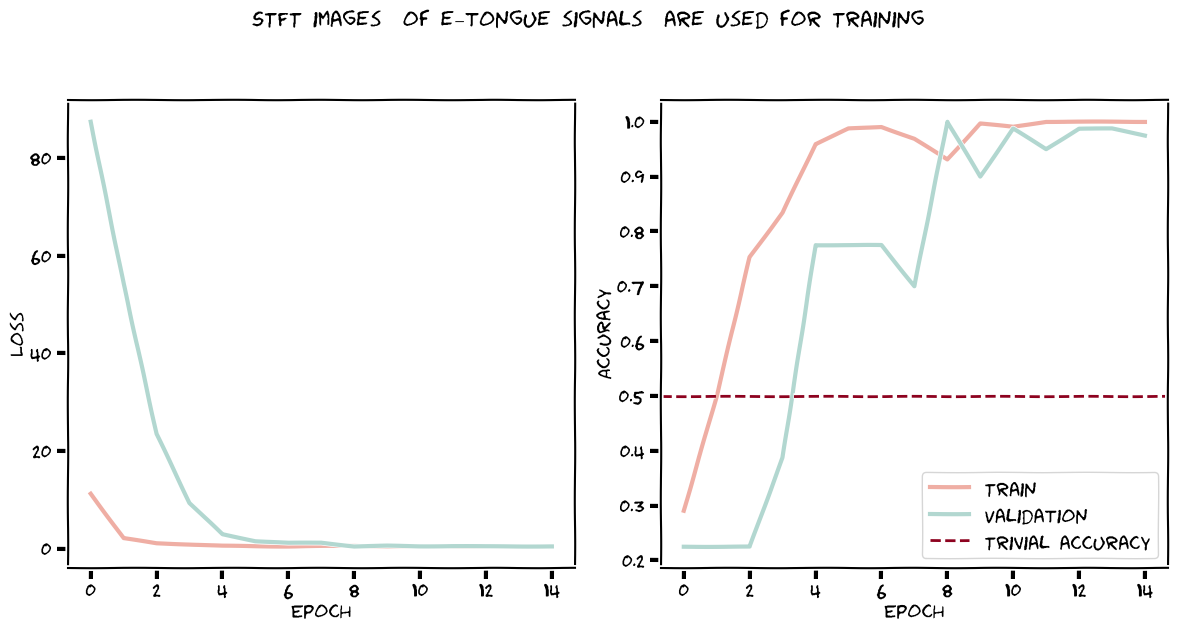

In [11]:
plot_history(history_ton_com, 'STFT images  of e_tongue signals  are used for')

In [12]:
k=asarray(Image.open('0c_128_hamming.png'))
for i in range(1,400):
  st=str(i)+'c_128_hamming.png'
  img = Image.open(st)
  numpydata = asarray(img)
  k=np.vstack((k,numpydata))

In [13]:
x=k.reshape(400,480,640,4)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [14]:
from tensorflow.keras import regularizers

model_com = models.Sequential()
model_com.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(480,640,4)))#, kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01)))
model_com.add(layers.MaxPooling2D((2, 2)))
model_com.add(layers.Conv2D(8, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_com.add(layers.MaxPooling2D((2, 2)))
model_com.add(tf.keras.layers.BatchNormalization())
model_com.add(layers.Conv2D(16, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_com.add(layers.MaxPooling2D((2, 2)))
model_com.add(tf.keras.layers.BatchNormalization())
model_com.add(layers.Conv2D(32, (2, 2), activation='relu', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_com.add(layers.Flatten())
model_com.add(layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.L2(0.01)))#, bias_regularizer=regularizers.L2(0.02)))
model_com.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_com.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 479, 639, 4)       68        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 239, 319, 4)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 238, 318, 8)       136       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 119, 159, 8)      0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 119, 159, 8)      32        
 hNormalization)                                                 
                                                      

In [16]:
history_com=model_com.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15, batch_size=20)


Epoch 1/15
16/16 [==============================] - 1s 63ms/step - loss: 0.3608 - accuracy: 0.9969 - val_loss: 2.2586 - val_accuracy: 0.4125
Epoch 2/15
16/16 [==============================] - 1s 46ms/step - loss: 0.3570 - accuracy: 0.9969 - val_loss: 1.6412 - val_accuracy: 0.7375
Epoch 3/15
16/16 [==============================] - 1s 44ms/step - loss: 0.3584 - accuracy: 1.0000 - val_loss: 1.2303 - val_accuracy: 0.8375
Epoch 4/15
16/16 [==============================] - 1s 48ms/step - loss: 0.3500 - accuracy: 1.0000 - val_loss: 1.3715 - val_accuracy: 0.6500
Epoch 5/15
16/16 [==============================] - 1s 44ms/step - loss: 0.3460 - accuracy: 1.0000 - val_loss: 2.0600 - val_accuracy: 0.4000
Epoch 6/15
16/16 [==============================] - 1s 49ms/step - loss: 0.3402 - accuracy: 1.0000 - val_loss: 1.0459 - val_accuracy: 0.6750
Epoch 7/15
16/16 [==============================] - 1s 50ms/step - loss: 0.3395 - accuracy: 1.0000 - val_loss: 1.3133 - val_accuracy: 0.6500
Epoch 8/15
16

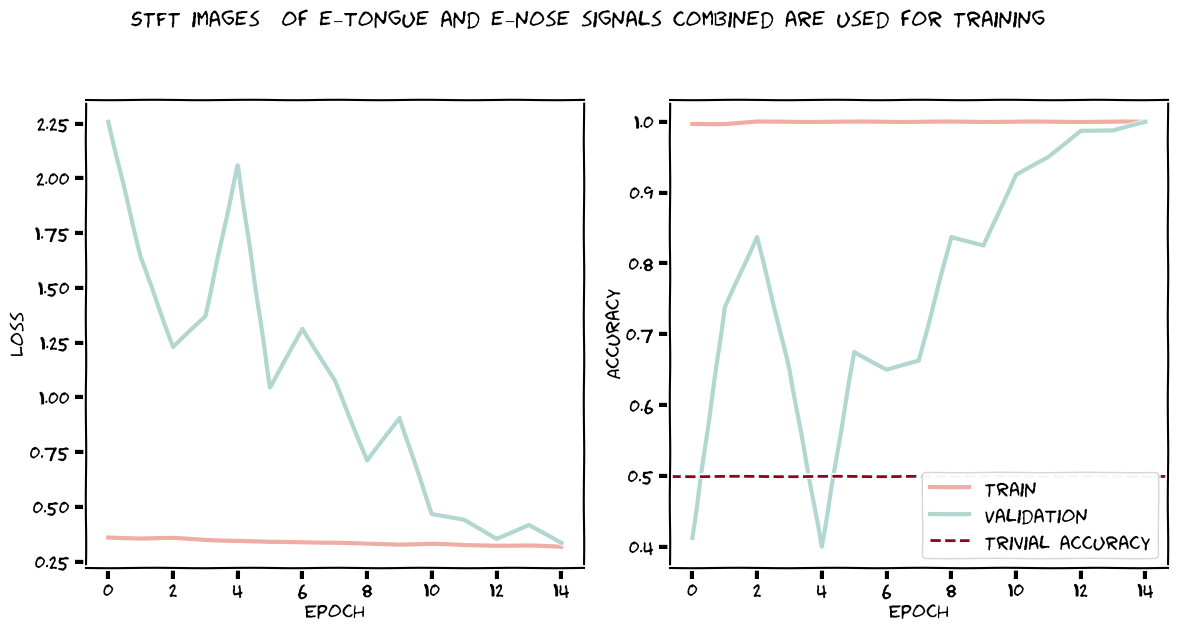

In [17]:
plot_history(history_com, 'STFT images  of e_tongue and e_nose signals combined are used for')

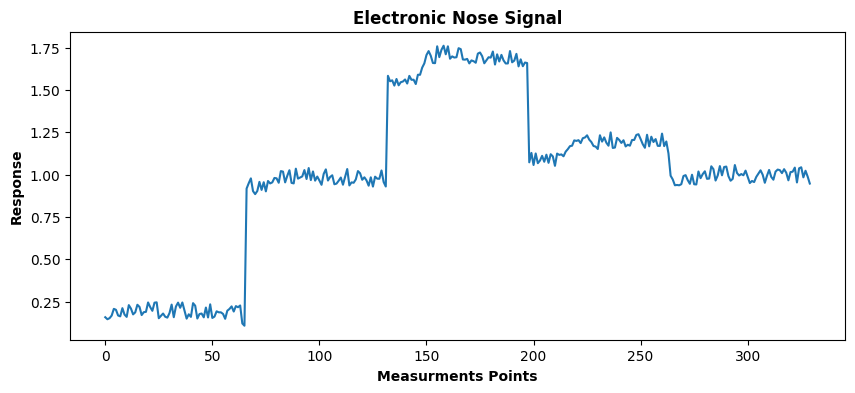

In [ ]:


class_A= df_et.iloc[0]
plt.rcParams['figure.figsize'] = [10, 4]
class_A.plot(kind='line')
fig=plt.xlabel('Measurments Points',fontweight='bold')
fig=plt.ylabel('Response',fontweight='bold')
fig=plt.title('Electronic Nose Signal', fontweight='bold')




#class_A=df_nose.iloc[0]
#class_B=df_nose.iloc[101]
#class_C=df_nose.iloc[201]
#class_D=df_nose.iloc[301]
#plt.rcParams['figure.figsize'] = [10, 4]
#class_A.plot(kind='line',color="red", label='Class A')
#class_B.plot(kind='line',color="blue", label='Class B')
#class_C.plot(kind='line',color="green", label='Class C')
#class_D.plot(kind='line',color="black", label='Class D')

#fig=plt.xlabel('Measurments Points',fontweight='bold')
#fig=plt.ylabel('Response',fontweight='bold')
#fig=plt.title('Different Classes of Tea- Electronic Tongue Signal', fontweight='bold')
#fig=plt.legend(loc='upper center')
savefig('(T)nose_signal.tiff')


In [ ]:
min=0
num=0
for x in range(2500,3000):
  if df_nose.iloc[0][x]<min:
    num=x
    min=df_nose.iloc[0][x]

    
print(num)
    
df_nose.iloc[0][2777] #695,1460,2115#2777

2776


-1.7545472393809

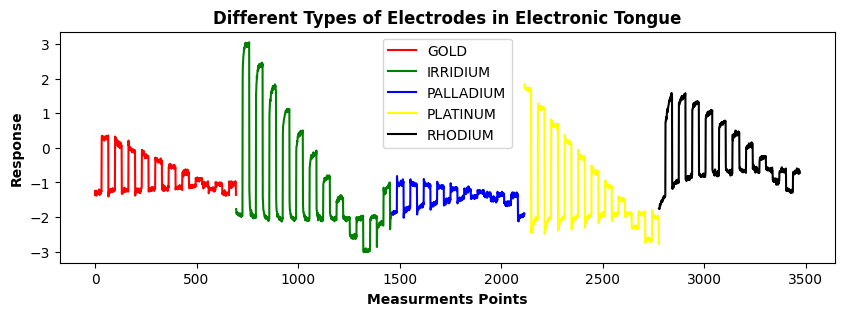

In [ ]:
E1=df_nose.iloc[0][0:695]
E2=df_nose.iloc[0][695:1460]
E3=df_nose.iloc[0][1460:2115]
E4=df_nose.iloc[0][2115:2777]
E5=df_nose.iloc[0][2777:]


plt.rcParams['figure.figsize'] = [10, 3]
E1.plot(kind='line',color="red",label='GOLD')
E2.plot(kind='line',color="green",label='IRRIDIUM')
E3.plot(kind='line',color="blue",label='PALLADIUM')
E4.plot(kind='line',color="yellow",label='PLATINUM')
E5.plot(kind='line',color="black",label='RHODIUM')

fig=plt.xlabel('Measurments Points',fontweight='bold')
fig=plt.ylabel('Response',fontweight='bold')
fig=plt.title('Different Types of Electrodes in Electronic Tongue', fontweight='bold')
fig=plt.legend(loc='upper center')
savefig('(T)tongue_electrodes.tiff')